.Implementación de los algoritmos de segmentación.

-K-means Clustering Algorithm. - Randomly initialized (N)


Los datos de "df_seg" se consiguieron desde un query, ubicado en mi carpeta de drive (Matt/B churn model)

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter

from lifelines import CoxPHFitter

In [132]:
df_seg = pd.read_csv('CDMX_60d_31jul2021.csv', encoding='latin-1')

# K means

In [133]:
#from sklearn import preprocessing
#from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

1. Drop non numeric values y Elegir número (k) de clusters

In [134]:
df_seg 

,shop_id,city_id,stat_date,is_churned,last_online_date,first_online_date,first_shop_order_date,last_shop_order_date,alive_time,first_online_first_order_gap,...,avg_daily_orders,avg_price_per_order,promotions_cnt,order_cancel_rate,order_negative_rate,actual_online_rate,exposure_order_rate,image_sales_item_rate,is_non_default_avatar,cooking_delay_rate_only_r_null
0,NaN,NaN,NaN,0,2021-07-31,2020-08-27,NaN,NaN,338,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.764608e+18,52090100.0,2021-07-31,1,2020-10-14,2020-07-13,2020-07-19,2020-10-10,93,6.0,...,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000
2,5.764608e+18,52140500.0,2021-07-31,1,2021-06-09,2021-01-20,NaN,NaN,140,NaN,...,NaN,NaN,NaN,0.0000,0.0000,0.1058,0.0000,0.0000,1.0,0.0000
3,5.764608e+18,52080200.0,2021-07-31,0,2021-07-11,2021-07-08,NaN,NaN,3,NaN,...,NaN,NaN,NaN,0.0000,0.0000,0.0032,0.0000,0.0000,0.0,0.0000
4,5.764608e+18,52210400.0,2021-07-31,0,2021-07-31,2020-10-21,NaN,NaN,283,NaN,...,NaN,NaN,NaN,0.0467,0.0206,0.8501,0.0047,0.8431,1.0,0.2887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118690,5.764608e+18,52240400.0,2021-07-31,1,2021-06-28,2021-06-28,NaN,NaN,0,NaN,...,NaN,NaN,NaN,0.0000,0.0000,0.0010,0.0000,0.0000,0.0,0.0000
118691,5.764608e+18,52080800.0,2021-07-31,0,2021-07-31,2021-04-08,NaN,NaN,114,NaN,...,NaN,NaN,NaN,0.0400,0.0896,0.4820,0.0017,1.0000,1.0,0.1159
118692,5.764608e+18,52090100.0,2021-07-31,1,2021-06-06,2020-03-26,2020-03-26,2020-12-25,437,0.0,...,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000
118693,5.764608e+18,52151600.0,2021-07-31,0,2021-07-31,2020-06-15,NaN,NaN,411,NaN,...,NaN,NaN,NaN,0.0758,0.0202,0.7969,0.0103,1.0000,1.0,0.0669


In [135]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118695 entries, 0 to 118694
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   shop_id                         117993 non-null  float64
 1   city_id                         117993 non-null  float64
 2   stat_date                       117993 non-null  object 
 3   is_churned                      118695 non-null  int64  
 4   last_online_date                118695 non-null  object 
 5   first_online_date               118695 non-null  object 
 6   first_shop_order_date           22676 non-null   object 
 7   last_shop_order_date            22676 non-null   object 
 8   alive_time                      118695 non-null  int64  
 9   first_online_first_order_gap    22676 non-null   float64
 10  complete_orders                 13299 non-null   float64
 11  days_with_orders                13299 non-null   float64
 12  avg_daily_orders

In [136]:
indices = ['shop_id', 'city_id','stat_date','last_online_date','first_online_date','first_shop_order_date','last_shop_order_date'  ]
#se quitan los indices seleccionados
df_seg1 = df_seg.drop(indices, axis = 1)

In [137]:
#no se pueden escalar los datos con datos de string
#df_seg1 = df_seg[pd.to_numeric(df_seg['frequency_segment'], errors='coerce').notnull()]

In [138]:
#df_seg1 = df_seg1.reset_index()

In [139]:
#from scipy.stats import zscore
# from scipy import stats
# #z_scores = stats.zscore(df_seg1)

# Q1 = np.percentile(df_seg1['order_cancel_rate'], 25, 
#                    interpolation = 'midpoint') 
  
# Q3 = np.percentile(df_seg1['order_cancel_rate'], 75,
#                    interpolation = 'midpoint') 
# IQR = Q3 - Q1 
  
# print("Old Shape: ", df_seg1.shape) 
  
# # Upper bound
# upper = np.where(df_seg1['order_cancel_rate'] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(df_seg1['order_cancel_rate'] <= (Q1-1.5*IQR))
  
# ''' Removing the Outliers '''
# df = df_seg1.drop(upper[0], inplace = True)
# df = df_seg1.drop(lower[0], inplace = True)
  
# print("New Shape: ", df.shape) 

# #df = df_seg1[(np.abs(stats.zscore(df_seg1[0])) < 3)]
# #abs_z_scores = np.abs(z_scores)
# #filtered_entries = (abs_z_scores < 3).all(axis=1)
# #new_df = df_seg1[filtered_entries]
# df

In [140]:
df_seg1 = df_seg1[df_seg1['order_cancel_rate']<0.16]
df_seg1 = df_seg1[df_seg1['order_negative_rate']<0.16]
df_seg1 = df_seg1[df_seg1['actual_online_rate']<1]

#df_seg1 = df_seg1.reset_index()

In [141]:
# Escalamos los datos, porque hay cantidades muy dispersas entre sí y no sería optimo dejarlas así
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_seg1)

In [142]:
#se convierte en un array de numpy
df_scaled

array([[ 1.05783744, -0.52163666, -0.19114638, ..., -0.8842733 ,
         0.55810071, -0.51260379],
       [ 1.05783744, -0.25123615,         nan, ..., -0.8842733 ,
         0.55810071, -0.51260379],
       [-0.94532483, -1.03942487,         nan, ..., -0.8842733 ,
        -1.7917913 , -0.51260379],
       ...,
       [ 1.05783744,  1.45746493, -0.40723287, ..., -0.8842733 ,
         0.55810071, -0.51260379],
       [-0.94532483,  1.30788167,         nan, ...,  1.30045334,
         0.55810071, -0.02786404],
       [-0.94532483,  0.23778604,         nan, ...,  0.20809002,
         0.55810071, -0.51260379]])

In [143]:
#Input contains NaN, infinity or a value too large for dtype('float64').
#Si no haces esto saldra el error de arriba, aqui cambias los NaN por un 0 y los numeros infitnitos los haces finitos
df_scaled = np.nan_to_num(df_scaled) 



# Método del codo (para determinar matematicamente el número apropiado de clusters)

La idea es que donde se encuentre un punto donde cambie la pendiente de manera más drástica, es ese el número más apropiado de clusters o sus puntos cercanos. Como se inicializan los puntos aleatoriamente ene cada corrida habrá difentes cods, por lo que sugiero correr este código unas 3-5 veces para ver que número K es el más común y de ahí elegir el K más apropiado.

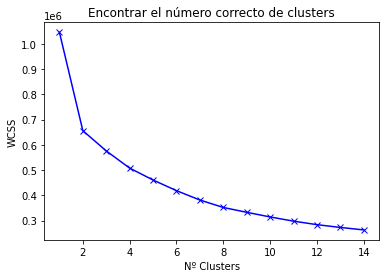

In [145]:
#para guardar diametros de cada k mean probado con diferentes k
scores = []

# para probar con k's de 1 a 15
range_values = range(1, 15)

for i in range_values:
  #creas el objeto k mean con data set escalda
  kmeans = KMeans(n_clusters = i)
    #recibe un array
  kmeans.fit(df_scaled)
  #guardas en score, la inertia de cada k mean, que es el diametro de un centroide
  scores.append(kmeans.inertia_) # la inercia (diametro) es la suma de los cuadrados de las distancias de las observaciones al centro del cluster más cercano

#graficar en x=range values y en y=scores, bx= blue con cruces
plt.plot(range_values, scores, 'bx-')
plt.title('Encontrar el número correcto de clusters')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS') 
plt.show()

# Detalles de Kmeans en Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# Tengamos en cuenta que la curva cambiará cada vez que ejecutemos la celda

Resultados
Corrida 1: hay un cambio poco significante en k=5

Corrida 2: hay un cambio poco significante en k=5


In [146]:
#se ocuparán k=6

# Agrupar los datos usando k-means

#ya que sabes el K apropiado con metodo del codo, se lo indicas
kmeans = KMeans(5)
#seleccionas el data frame para hacer los clusters
kmeans.fit(df_scaled)
#creo que obtienes a que frupo pertenece cada etiqueta
labels = kmeans.labels_


In [147]:
#7 clusters con 26 columnas cada una (como se observo al reescalarlo pero checar antes de reescalarlo)
kmeans.cluster_centers_.shape

(5, 15)

In [148]:
#  un vistazo a los centros de los clústeres -- df_seg1 es el df que se ocupo para escalar los datos
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_seg1.columns])
cluster_centers 

#obtienes coordenadas de cada variable graficada pero obvio no se entiende porque además están reescaldas, debes desescalrlas

,is_churned,alive_time,first_online_first_order_gap,complete_orders,days_with_orders,avg_daily_orders,avg_price_per_order,promotions_cnt,order_cancel_rate,order_negative_rate,actual_online_rate,exposure_order_rate,image_sales_item_rate,is_non_default_avatar,cooking_delay_rate_only_r_null
0,0.884672,-0.231948,0.009365,-0.002959,-0.007715,-0.002601,-0.001434,-0.002384,-0.434625,-0.434394,-0.858801,-0.512027,-0.827490,0.558101,-0.495656
1,-0.861608,0.139107,-0.022545,-0.069720,-0.042690,-0.064264,-0.003740,-0.054169,0.693809,3.565183,0.800918,0.166984,0.827304,0.244593,0.833597
2,-0.914967,0.582475,-0.004228,0.031691,0.040460,0.029119,0.015174,0.027072,-0.072151,0.150480,1.025840,0.698582,0.995950,0.478998,0.495472
3,-0.871002,0.275384,-0.017006,-0.052728,-0.045396,-0.049888,-0.029184,-0.049361,2.832667,0.188254,0.699707,0.284122,0.840246,0.297927,0.589998
4,0.624980,-0.713603,0.003654,-0.011659,-0.027085,-0.010316,-0.010564,-0.009753,-0.419281,-0.423104,-0.766284,-0.479630,-0.824197,-1.791791,-0.436995


# Descripcion por cluster

In [149]:
# Para entender lo que significan estos números, realicemos una transformación inversa, o sea desescalas los datos
cluster_centers = scaler.inverse_transform(cluster_centers)
#guardas el data desescalado
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_seg1.columns])

#estos son los 7 clusters y sus características
cluster_centers

,is_churned,alive_time,first_online_first_order_gap,complete_orders,days_with_orders,avg_daily_orders,avg_price_per_order,promotions_cnt,order_cancel_rate,order_negative_rate,actual_online_rate,exposure_order_rate,image_sales_item_rate,is_non_default_avatar,cooking_delay_rate_only_r_null
0,0.913554,143.352610,11.567522,153.637763,27.673907,3.466059,223.399935,83.782468,0.000072,0.000024,0.025102,0.000080,0.025991,1.000000e+00,0.002339
1,0.041792,207.847900,10.681486,131.835919,26.943644,3.137001,223.186117,72.144453,0.032653,0.072808,0.695929,0.003580,0.783429,8.665863e-01,0.185792
2,0.015155,284.912533,11.190110,164.953406,28.679780,3.635333,224.940284,90.402494,0.010538,0.010668,0.786838,0.006321,0.860622,9.663378e-01,0.139127
3,0.037103,231.535153,10.835284,137.384959,26.887160,3.213718,220.826250,73.224887,0.094408,0.011355,0.655021,0.004184,0.789353,8.892828e-01,0.152172
4,0.783913,59.633130,11.408966,150.796807,27.269476,3.424888,222.553195,82.126491,0.000515,0.000230,0.062495,0.000247,0.027498,3.264056e-14,0.010435


Cluster 0
-churn:  ALTA probabilidad
-151 dias en linea, 5 día sin ordenes
-frecuency-seg: 2.7
-monetary-seg: 1.7
-recency-seg: 4.9
pocos dias y muchos sin ordenes

Cluster 1
-churn: BAJA probabilidad
-354 dias en linea, 9 día sin ordenes
-frecuency-seg: 4
-monetary-seg: 4.3
-recency-seg: 2.5

Cluster 2
-churn: MUY BAJA probabilidad
-467 dias en linea, 3 día sin ordenes
-frecuency-seg: 4.9
-monetary-seg: 4.9
-recency-seg: 2

Cluster 3
-churn: NULA probabilidad
-493 dias en linea, 1 día sin ordenes
-frecuency-seg: 5
-monetary-seg: 5
-recency-seg: 2

Cluster 4
-churn: MEDIANA probabilidad (EN RIESGO si pasan más días??)
-142 dias en linea, 5 día sin ordenes
-frecuency-seg: 2
-monetary-seg: 2.7
-recency-seg: 3.1



0:3500
1: 7500
2: 700
3: 36
4:10000

 


In [150]:
#cuantas filas existen -> fila = observacion

labels.shape # Etiquetas del clúster asociado a cada observación

(107945,)

In [151]:
#guardas como target Y (target a predecir)
y_kmeans = kmeans.fit_predict(df_scaled)
 #cada label de cluster correspndiente a cada fila del df
y_kmeans

array([1, 1, 2, ..., 1, 3, 0])

In [152]:
#debe de ser el mismo numero de labels y de filas en df_scaled
y_kmeans.shape

(107945,)

Deberemos de concatenar las labels al df_seg1 pero recuerda que se le quitaron valores para poder el calculo asi que debe de hacerse eso para que corresponda la etiqueta al R.


In [153]:
#si no reinicias los index tendrás columnas extras -> SOLO PUEDES CORRERLO UNA VEZ
df_seg1 = df_seg1.reset_index()

In [154]:


#se guarda en un dataframe las etiquetas para concatenarlo al dataframe original
cluster = pd.DataFrame({'cluster':labels})

#ahora tenemos un dataset
df_cluster_kmeans = pd.concat([df_seg1, cluster], axis = 1)
f = ['index'
     #,'level_0'
    ]
df_cluster_kmeans = df_cluster_kmeans.drop(f, axis = 1)
df_cluster_kmeans

,is_churned,alive_time,first_online_first_order_gap,complete_orders,days_with_orders,avg_daily_orders,avg_price_per_order,promotions_cnt,order_cancel_rate,order_negative_rate,actual_online_rate,exposure_order_rate,image_sales_item_rate,is_non_default_avatar,cooking_delay_rate_only_r_null,cluster
0,1,93,6.0,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0
1,1,140,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.1058,0.0000,0.0000,1.0,0.0000,0
2,0,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0032,0.0000,0.0000,0.0,0.0000,4
3,0,283,NaN,NaN,NaN,NaN,NaN,NaN,0.0467,0.0206,0.8501,0.0047,0.8431,1.0,0.2887,2
4,1,89,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107940,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0010,0.0000,0.0000,0.0,0.0000,4
107941,0,114,NaN,NaN,NaN,NaN,NaN,NaN,0.0400,0.0896,0.4820,0.0017,1.0000,1.0,0.1159,1
107942,1,437,0.0,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0
107943,0,411,NaN,NaN,NaN,NaN,NaN,NaN,0.0758,0.0202,0.7969,0.0103,1.0000,1.0,0.0669,3


In [113]:
import matplotlib.pyplot as plt

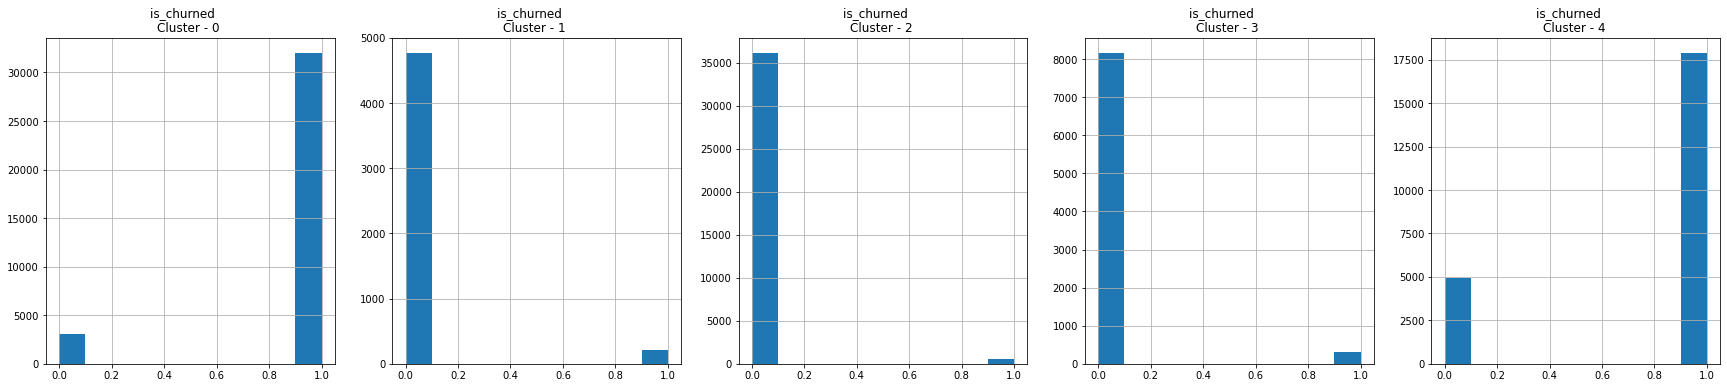

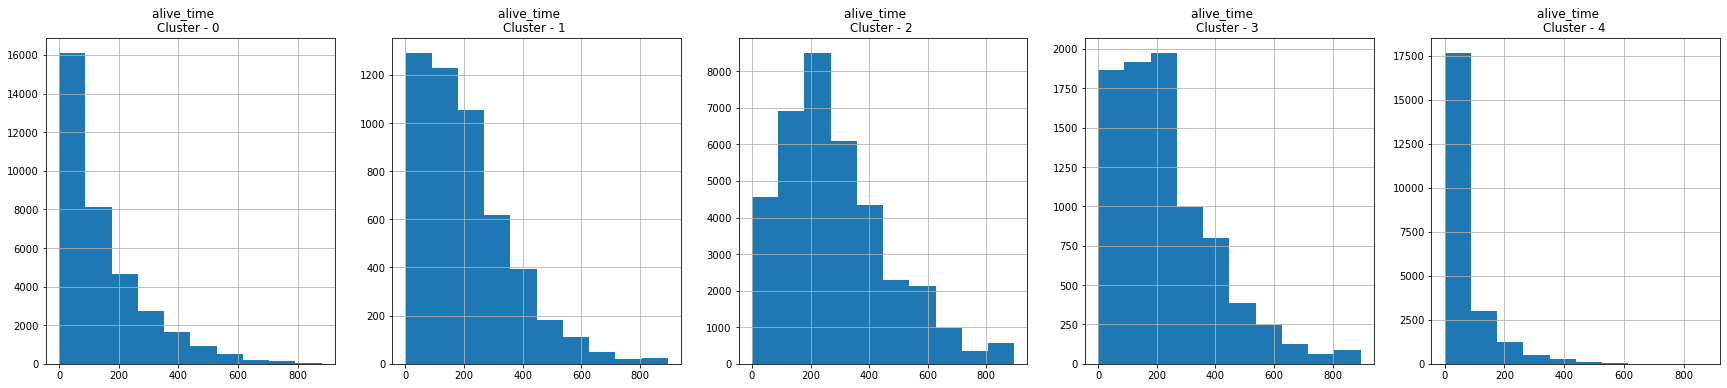

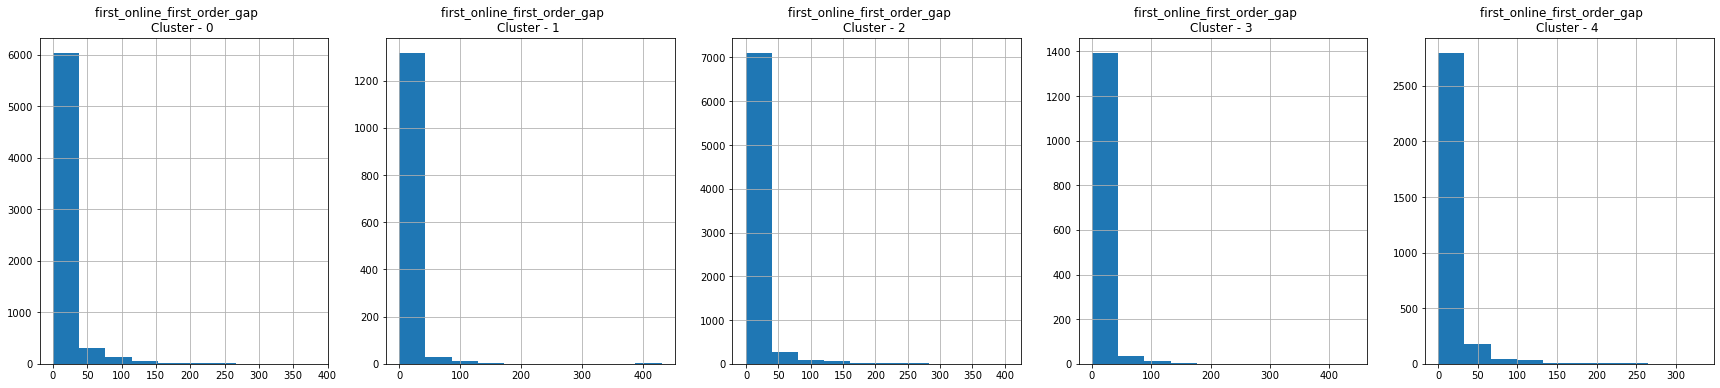

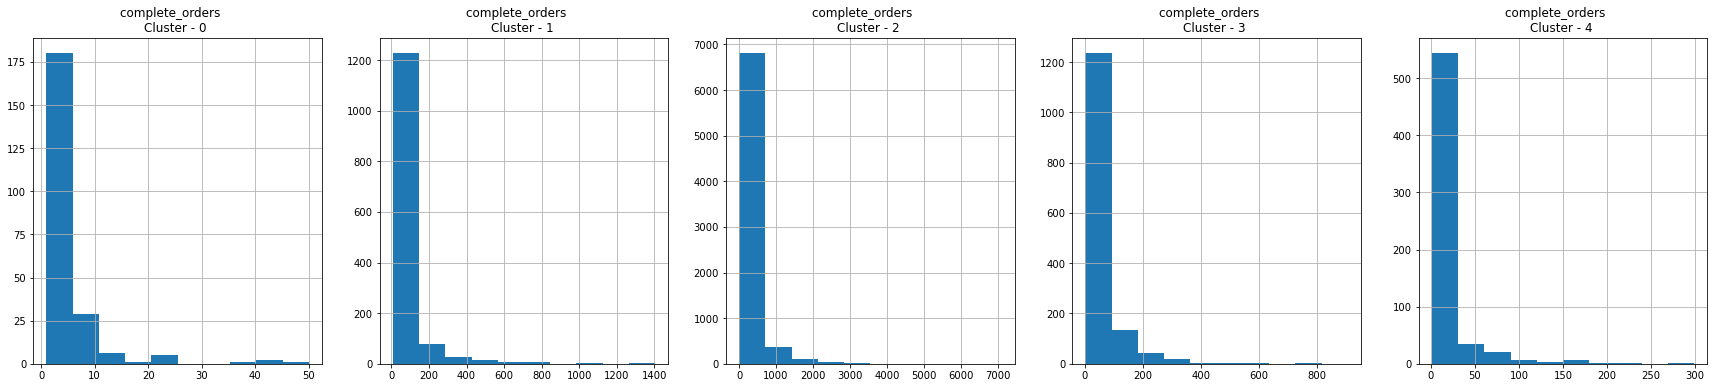

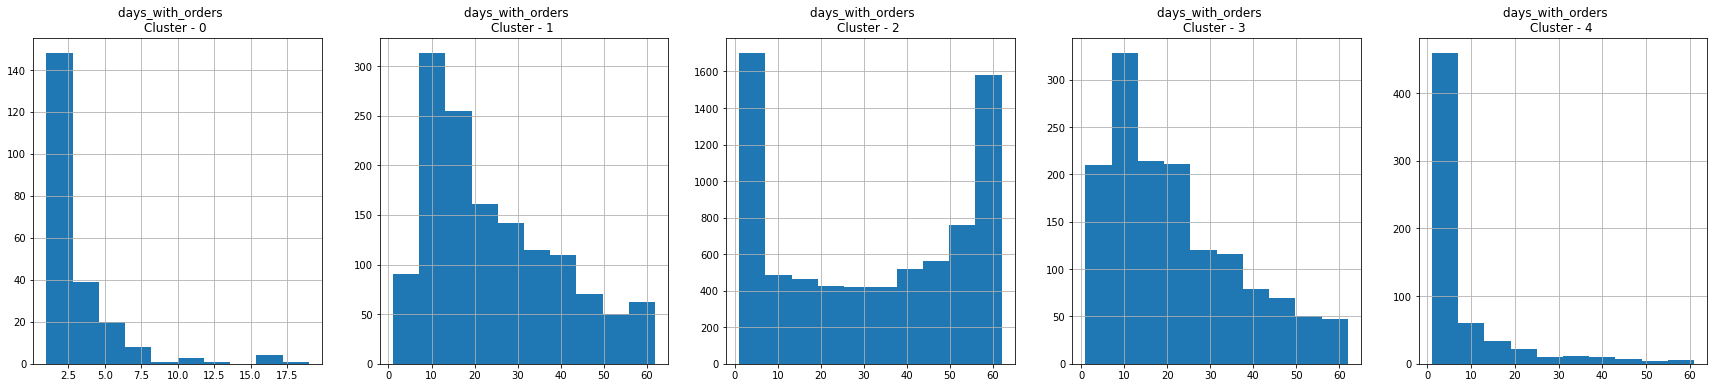

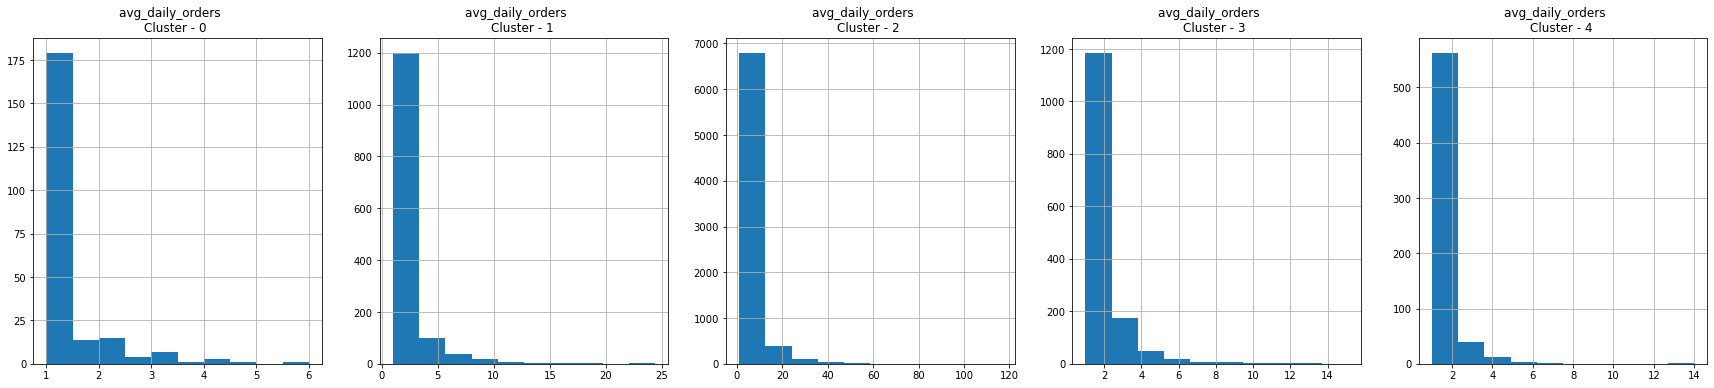

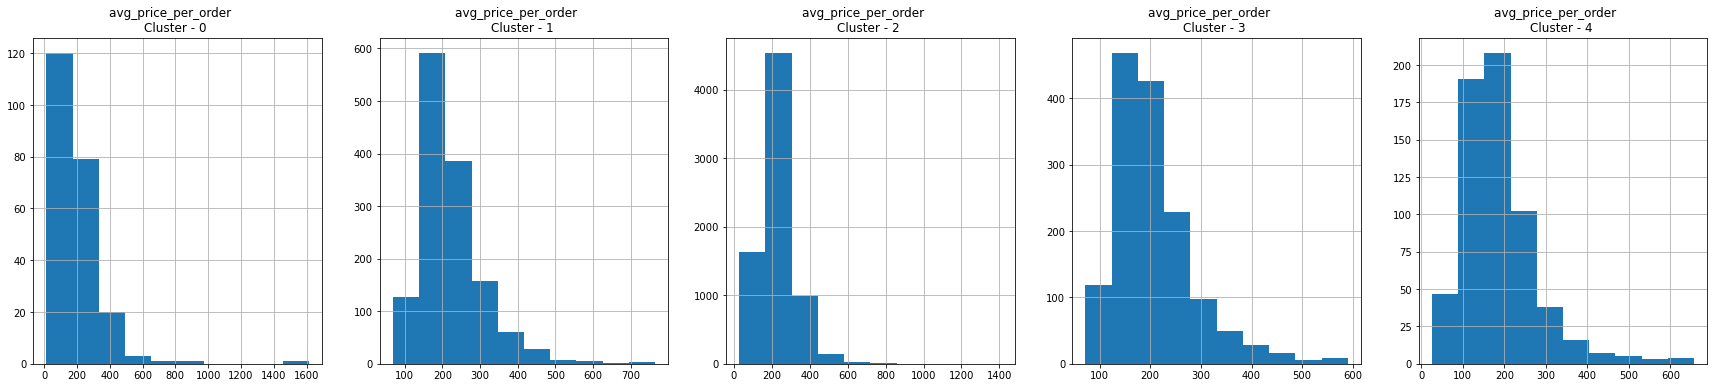

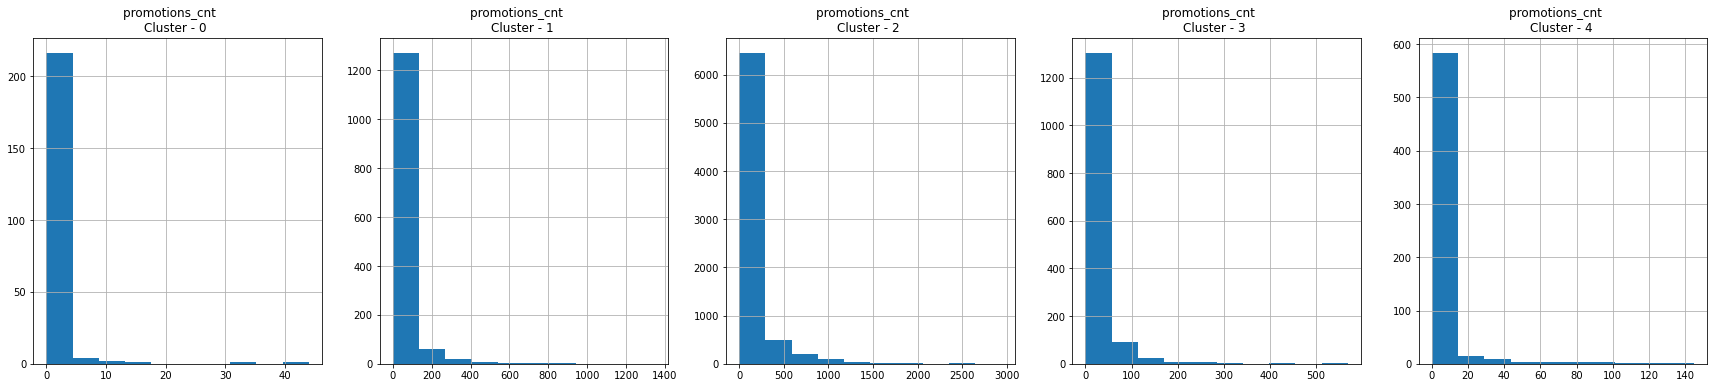

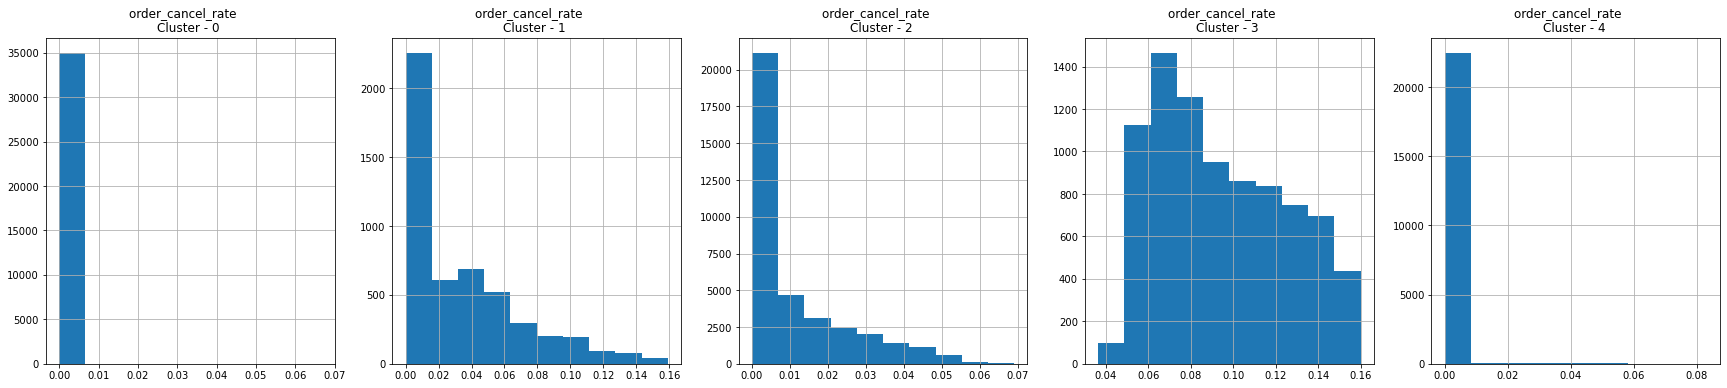

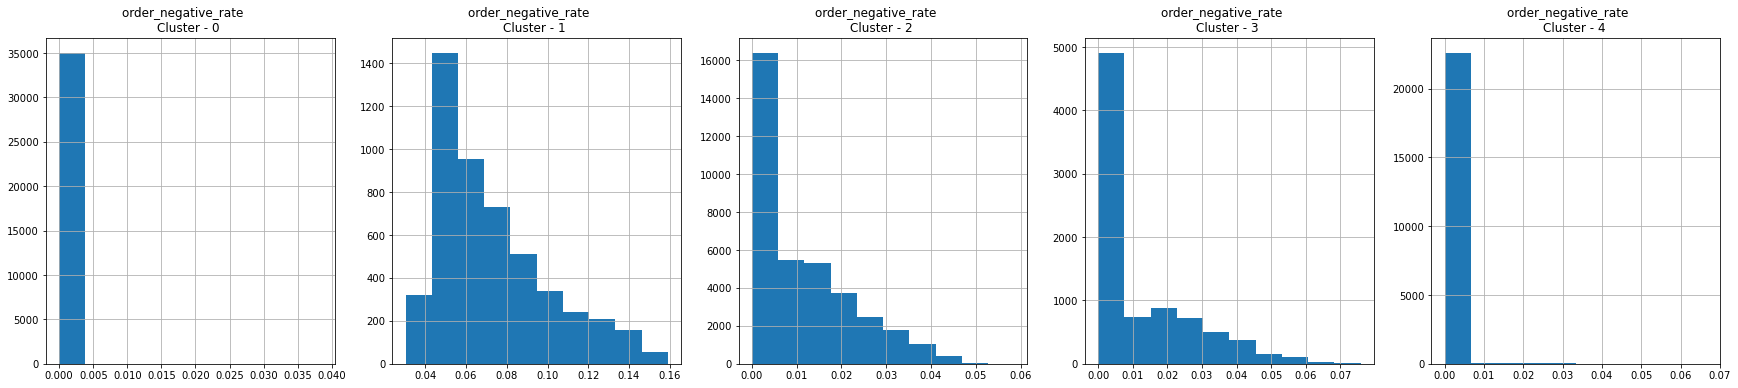

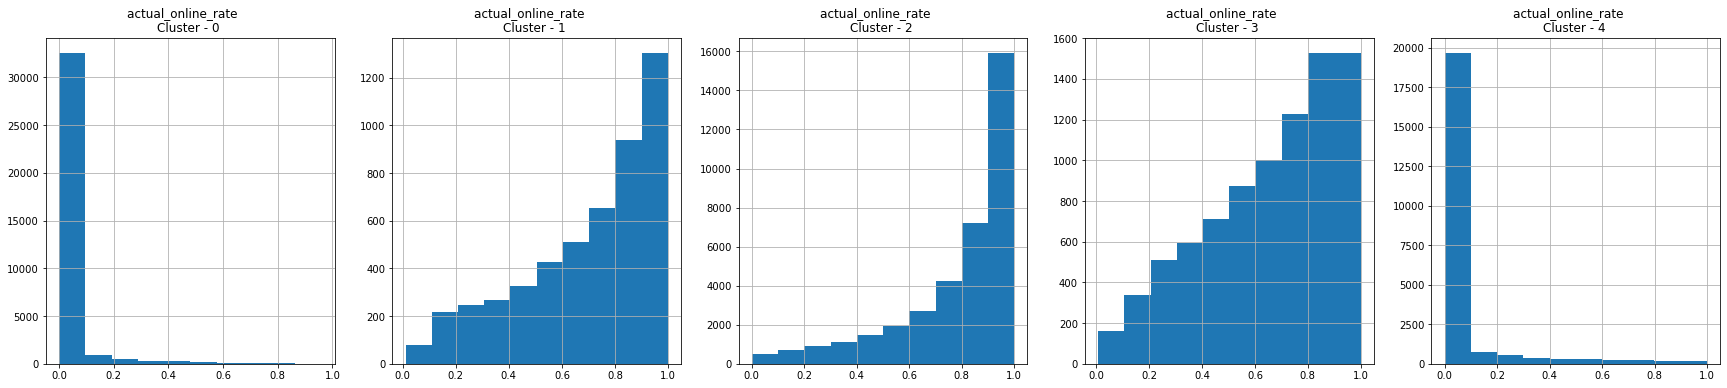

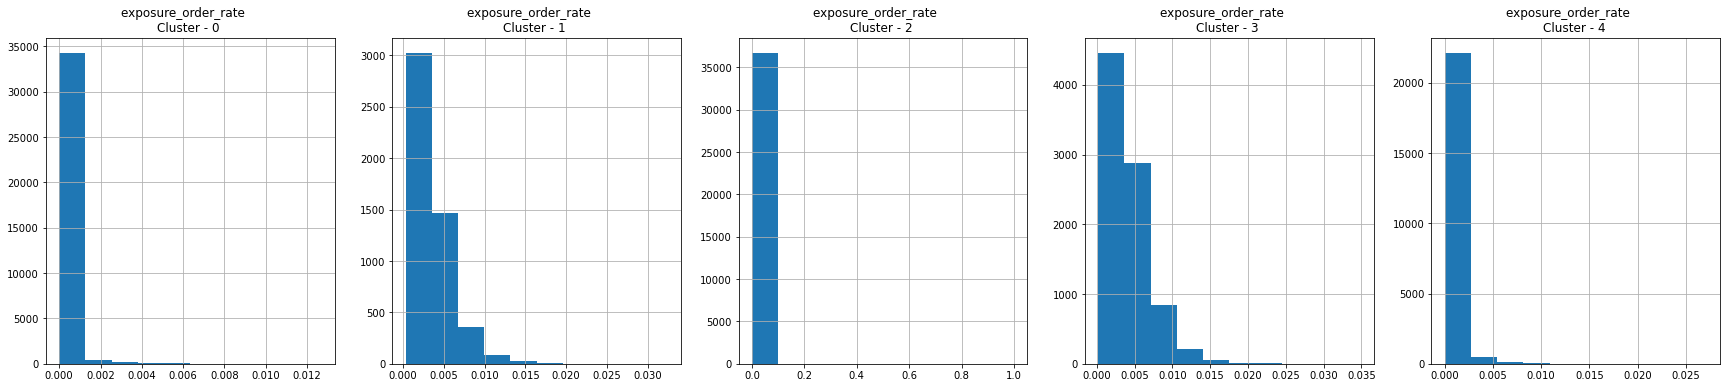

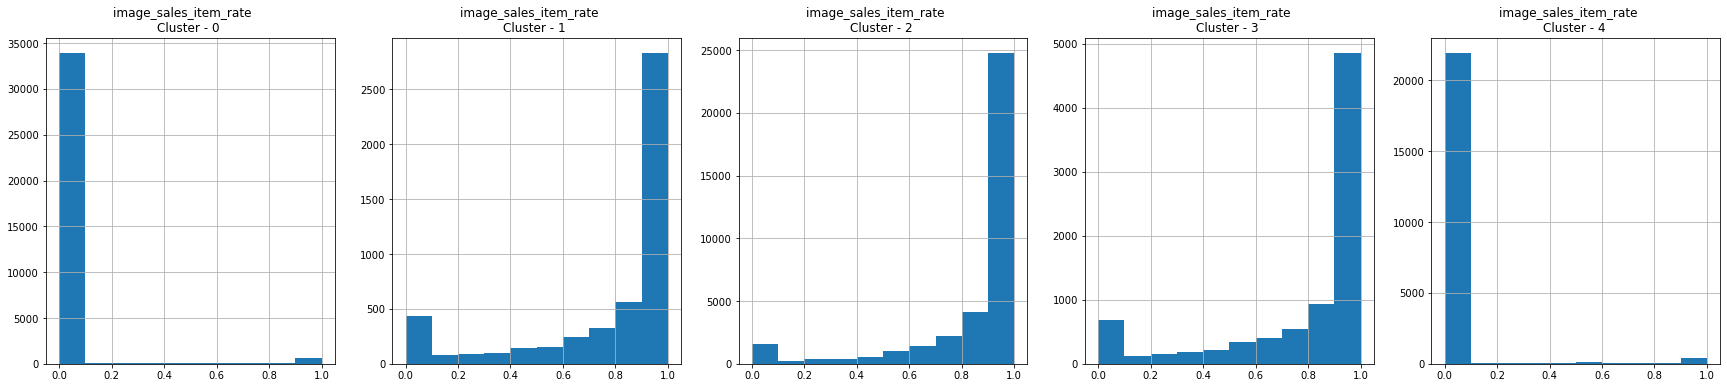

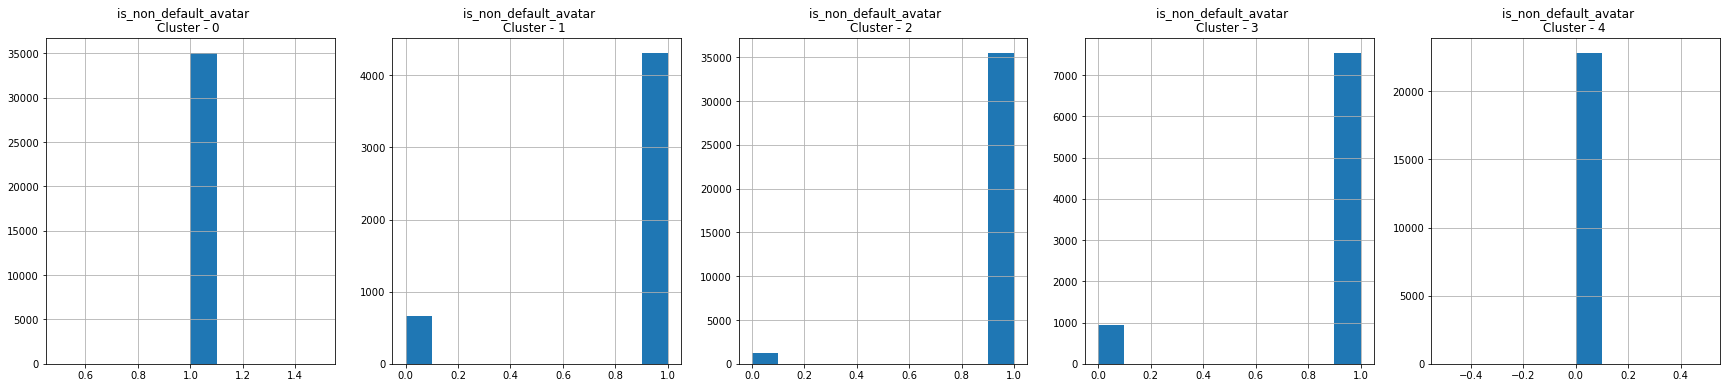

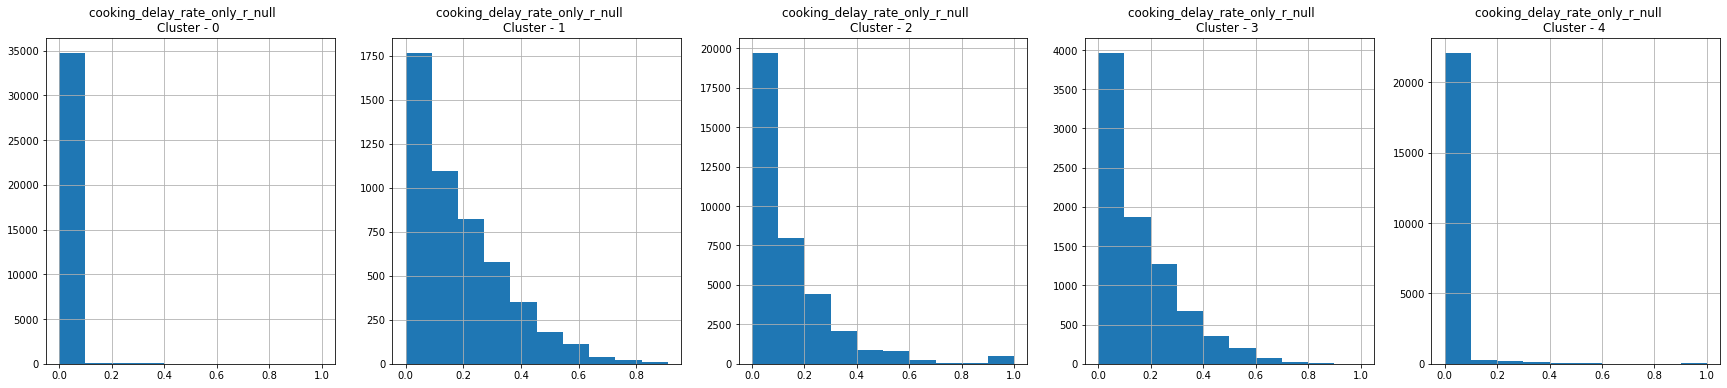

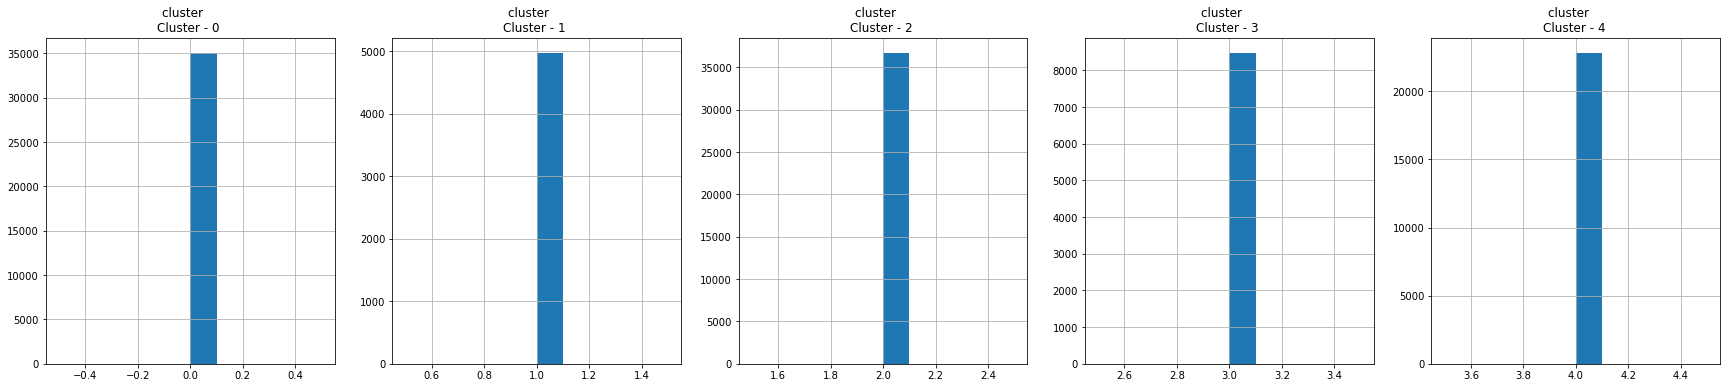

In [155]:
# Representar un histograma para cada característica según el clúster al que pertenece

#graficas las filas cuantitavias de cada cluster
#solo graficaras para las primeras 8 columnas
for i in df_cluster_kmeans.columns[:17]:
  plt.figure(figsize = (30, 6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = df_cluster_kmeans[df_cluster_kmeans['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()

#en x está la variable dependiente(ventas, mes, etc) y en y como la cantidad acumulativa 

1. raw data
3. recency
4.
2. lifetable


In [116]:
#el cluster 3 es un cluster que nos hace ruido y es innecesario, entonces realmente sólo tendremos 6 clusters, no
#df_cluster_kmeans['cluster'] = df_cluster_kmeans['cluster'].replace([5],6)

In [157]:
df_cluster_kmeans.describe()

,is_churned,alive_time,first_online_first_order_gap,complete_orders,days_with_orders,avg_daily_orders,avg_price_per_order,promotions_cnt,order_cancel_rate,order_negative_rate,actual_online_rate,exposure_order_rate,image_sales_item_rate,is_non_default_avatar,cooking_delay_rate_only_r_null,cluster
count,107945.000000,107945.000000,20062.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,107945.000000,107945.000000,107945.000000,107945.000000,107945.000000,107945.000000,107945.000000,107945.000000
mean,0.471916,183.668924,11.307497,154.604148,27.835001,3.479939,223.532971,84.318355,0.012621,0.007929,0.372213,0.002719,0.404752,0.762499,0.070746,1.806022
std,0.499213,173.817047,27.767353,326.582963,20.880488,5.336667,92.750740,224.750252,0.028873,0.018198,0.404183,0.005155,0.457725,0.425553,0.138013,1.493127
min,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,0.000000,10.000000,8.000000,1.166667,163.728012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,140.000000,2.000000,41.000000,24.000000,1.676073,206.536317,2.000000,0.000000,0.000000,0.131000,0.000100,0.000000,1.000000,0.000000,2.000000
75%,1.000000,272.000000,9.000000,144.000000,48.000000,3.212121,263.496681,55.000000,0.007600,0.008300,0.821900,0.004300,0.963000,1.000000,0.090500,3.000000
max,1.000000,895.000000,442.000000,7106.000000,62.000000,116.491803,1612.900000,2942.000000,0.159900,0.159100,0.999900,1.000000,1.000000,1.000000,1.000000,4.000000


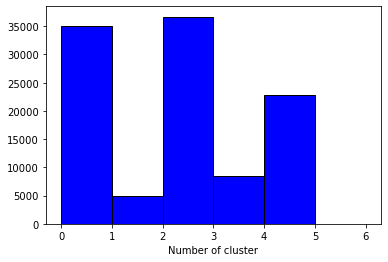

In [158]:
df_cluster_kmeans['cluster'].hist(bins=range(0,7,1),grid=False, color="blue", ec="black")
plt.xlabel("Number of cluster")
plt.show("Amount of R's")

In [118]:
#separar cada cluster para hacer su resumen
dfc0 = df_cluster_kmeans[df_cluster_kmeans['cluster']==0]
dfc1 = df_cluster_kmeans[df_cluster_kmeans['cluster']==1]
dfc2 = df_cluster_kmeans[df_cluster_kmeans['cluster']==2]
dfc3 = df_cluster_kmeans[df_cluster_kmeans['cluster']==3]
dfc4 = df_cluster_kmeans[df_cluster_kmeans['cluster']==4]
#dfc6 = df_cluster_kmeans[df_cluster_kmeans['cluster']==6]

In [159]:
dfc0.describe()

,is_churned,alive_time,first_online_first_order_gap,complete_orders,days_with_orders,avg_daily_orders,avg_price_per_order,promotions_cnt,order_cancel_rate,order_negative_rate,actual_online_rate,exposure_order_rate,image_sales_item_rate,is_non_default_avatar,cooking_delay_rate_only_r_null,cluster
count,22926.000000,22926.000000,3091.000000,625.000000,625.000000,625.000000,625.000000,625.000000,22926.000000,22926.000000,22926.000000,22926.000000,22926.000000,22926.0,22926.000000,22926.0
mean,0.777065,60.289802,12.155613,22.494400,9.500800,1.520921,193.319859,6.824000,0.000673,0.000352,0.074464,0.000276,0.032709,0.0,0.005661,0.0
std,0.416224,87.742299,26.896627,50.639504,13.721839,1.059925,102.015309,24.813298,0.005266,0.003147,0.208165,0.001113,0.162646,0.0,0.032143,0.0
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,1.000000,26.000000,3.000000,4.000000,3.000000,1.000000,175.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,1.000000,80.000000,11.000000,16.000000,11.000000,1.666667,231.200000,1.000000,0.000000,0.000000,0.001900,0.000000,0.000000,0.0,0.000000,0.0
max,1.000000,739.000000,331.000000,477.000000,61.000000,14.000000,814.333333,340.000000,0.083300,0.066700,6.103200,0.017000,1.000000,0.0,0.416700,0.0


In [160]:
dfc1.describe()

,is_churned,alive_time,first_online_first_order_gap,complete_orders,days_with_orders,avg_daily_orders,avg_price_per_order,promotions_cnt,order_cancel_rate,order_negative_rate,actual_online_rate,exposure_order_rate,image_sales_item_rate,is_non_default_avatar,cooking_delay_rate_only_r_null,cluster
count,31774.000000,31774.000000,6283.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,31774.000000,31774.000000,31774.000000,31774.000000,31774.000000,31774.000000,31774.000000,31774.0
mean,0.011487,301.884874,8.279962,248.968942,36.643966,4.909178,231.785244,138.504853,0.011233,0.011795,0.812103,0.006946,0.890255,0.987159,0.084857,1.0
std,0.106563,182.242389,24.807513,414.559233,21.012309,6.794750,88.352388,291.569171,0.014393,0.011811,0.458075,0.007434,0.199376,0.112589,0.080952,0.0
min,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,26.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,170.000000,0.000000,25.000000,17.000000,1.347826,173.313079,0.000000,0.000000,0.000000,0.722800,0.003300,0.872625,1.000000,0.013300,1.0
50%,0.000000,266.000000,1.000000,99.000000,42.000000,2.360000,216.166915,16.000000,0.005000,0.009900,0.887600,0.006000,0.983100,1.000000,0.063800,1.0
75%,0.000000,410.000000,6.000000,282.000000,57.000000,5.400000,271.235928,138.000000,0.018200,0.019000,0.963500,0.009500,1.000000,1.000000,0.137800,1.0
max,1.000000,895.000000,405.000000,7106.000000,62.000000,116.491803,1079.642857,3153.000000,0.090300,0.058600,39.806000,1.000000,1.000000,1.000000,0.463900,1.0


In [161]:
dfc2.describe()

,is_churned,alive_time,first_online_first_order_gap,complete_orders,days_with_orders,avg_daily_orders,avg_price_per_order,promotions_cnt,order_cancel_rate,order_negative_rate,actual_online_rate,exposure_order_rate,image_sales_item_rate,is_non_default_avatar,cooking_delay_rate_only_r_null,cluster
count,35363.000000,35363.000000,6792.000000,263.000000,263.000000,263.000000,263.000000,263.000000,35363.000000,35363.000000,35363.000000,35363.000000,35363.000000,35363.0,35363.000000,35363.0
mean,0.899697,143.005514,13.538280,5.988593,3.935361,1.273036,214.107918,1.665399,0.000096,0.000023,0.040874,0.000079,0.021252,1.0,0.001244,2.0
std,0.300407,140.696926,30.592124,11.314209,5.120644,0.698433,169.914033,6.624773,0.001933,0.000712,0.153795,0.000466,0.135229,0.0,0.014093,0.0
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.0
25%,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,121.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.0
50%,1.000000,101.000000,3.000000,2.000000,2.000000,1.000000,172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.0
75%,1.000000,209.000000,12.000000,5.000000,4.000000,1.222222,257.766667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.0
max,1.000000,855.000000,400.000000,100.000000,35.000000,6.000000,1612.900000,56.000000,0.066700,0.038500,3.003300,0.012700,1.000000,1.0,0.375000,2.0


In [162]:
dfc3.describe()

,is_churned,alive_time,first_online_first_order_gap,complete_orders,days_with_orders,avg_daily_orders,avg_price_per_order,promotions_cnt,order_cancel_rate,order_negative_rate,actual_online_rate,exposure_order_rate,image_sales_item_rate,is_non_default_avatar,cooking_delay_rate_only_r_null,cluster
count,4611.000000,4611.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.0
mean,0.043158,209.729343,9.177953,65.525984,24.061417,2.124255,224.936247,37.111811,0.033170,0.075551,0.699858,0.003496,0.786163,0.872479,0.171962,3.0
std,0.203234,153.681616,23.566511,105.326857,14.717867,1.814806,87.755155,89.487544,0.037954,0.027240,0.253636,0.002403,0.310823,0.333592,0.150383,0.0
min,0.000000,1.000000,0.000000,7.000000,1.000000,1.000000,68.375000,0.000000,0.000000,0.034500,0.010300,0.000300,0.000000,0.000000,0.000000,3.0
25%,0.000000,89.000000,1.000000,16.000000,12.000000,1.250000,164.828125,0.000000,0.000000,0.054300,0.534700,0.001900,0.703500,1.000000,0.052600,3.0
50%,0.000000,181.000000,3.000000,33.000000,20.000000,1.555556,204.731802,7.500000,0.022100,0.068200,0.775700,0.002900,0.943700,1.000000,0.142900,3.0
75%,0.000000,288.000000,9.000000,68.000000,34.000000,2.208701,264.124970,33.000000,0.055600,0.090900,0.910900,0.004400,1.000000,1.000000,0.259500,3.0
max,1.000000,895.000000,430.000000,1210.000000,62.000000,22.914894,764.714286,1208.000000,0.159100,0.159100,1.209900,0.032500,1.000000,1.000000,0.909100,3.0


In [163]:
dfc4.describe()

,is_churned,alive_time,first_online_first_order_gap,complete_orders,days_with_orders,avg_daily_orders,avg_price_per_order,promotions_cnt,order_cancel_rate,order_negative_rate,actual_online_rate,exposure_order_rate,image_sales_item_rate,is_non_default_avatar,cooking_delay_rate_only_r_null,cluster
count,6469.000000,6469.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,6469.000000,6469.000000,6469.000000,6469.000000,6469.000000,6469.000000,6469.000000,6469.0
mean,0.072963,201.215026,14.739865,45.491554,17.177365,1.770195,228.846451,21.346847,0.011857,0.007747,0.655581,0.003316,0.758165,0.846035,0.457423,4.0
std,0.260096,157.727983,32.774000,87.538662,17.013121,1.542439,103.087435,63.700250,0.020234,0.012888,0.332101,0.002862,0.330442,0.360943,0.203269,0.0
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,39.500000,0.000000,0.000000,0.000000,0.000700,0.000100,0.000000,0.000000,0.187500,4.0
25%,0.000000,78.000000,1.000000,3.000000,3.000000,1.000000,164.984694,0.000000,0.000000,0.000000,0.427100,0.001200,0.636400,1.000000,0.326000,4.0
50%,0.000000,168.000000,4.000000,13.000000,10.000000,1.291667,207.500000,0.000000,0.000000,0.000000,0.740500,0.002500,0.922500,1.000000,0.400000,4.0
75%,0.000000,276.000000,13.000000,48.000000,28.000000,1.909091,267.145290,10.000000,0.018500,0.013700,0.910400,0.004600,1.000000,1.000000,0.500000,4.0
max,1.000000,895.000000,343.000000,1014.000000,61.000000,29.333333,1254.500000,781.000000,0.142900,0.074100,9.605300,0.024800,1.000000,1.000000,1.000000,4.0


# ----- Models-----

In [ ]:
from lifelines import CoxPHFitter
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter

# Kaplan model for clusters "alive time"

Text(0, 0.5, 'Survival probability %')

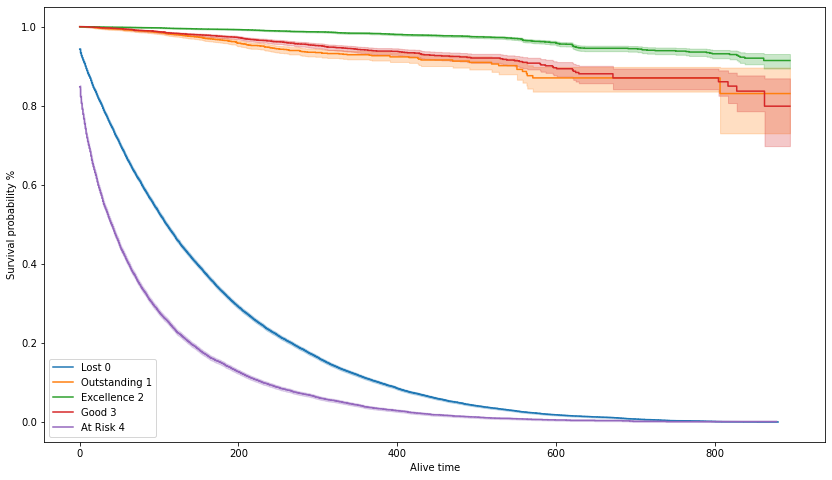

In [165]:
#eje x: T: dias sin ordenes
Tc = df_cluster_kmeans['alive_time']    ## days with 0 orders before last online
#eje y: C: churn: probablididad de que NO haga churn
Cc = df_cluster_kmeans['is_churned']     ## R churned X or retained

#clusters
cls = df_cluster_kmeans['cluster']             ## Create the cohorts from the 'cluster' column
c0 = (cls == 0)    
c1 = (cls == 1)    
c2 = (cls == 2)    
c4 = (cls == 3)    
c5 = (cls == 4)
#c6 = (cls == 6)

kmf = KaplanMeierFitter() 
#fit el modelo R normal (así mismo para los otros 2)
kmf.fit(Tc[c0], Cc[c0], label='Lost 0')    ## fit the cohort 1 data
ax = kmf.plot(figsize=(14,8))

kmf.fit(Tc[c1], Cc[c1], label='Outstanding 1')    ## fit the cohort 2 data
ax1 = kmf.plot(figsize=(14,8), ax=ax)

kmf.fit(Tc[c2], Cc[c2], label='Excellence 2')    ## fit the cohort 2 data
ax2 = kmf.plot(figsize=(14,8), ax=ax1)

kmf.fit(Tc[c4], Cc[c4], label='Good 3')    ## fit the cohort 2 data
ax4 = kmf.plot(figsize=(14,8), ax=ax2)

kmf.fit(Tc[c5], Cc[c5], label='At Risk 4')    ## fit the cohort 2 data
ax5 = kmf.plot(figsize=(14,8), ax=ax4)

#kmf.fit(Tc[c6], Cc[c6], label='Surviving ')    ## fit the cohort 2 data
#ax6 = kmf.plot(figsize=(14,8), ax=ax5)

ax5.set_xlabel("Alive time")
ax5.set_ylabel("Survival probability %")
#kmf.fit(Tc[c4], Cc[c4], label='Cluster 4')    ## fit the cohort 2 data
#ax4 = kmf.plot(figsize=(14,8), ax=ax3)

# # Kaplan model for clusters "online days"

In [ ]:
#time alive
Ta = df_cluster_kmeans['online_days_without_orders']   

kmf2 = KaplanMeierFitter() 
#fit el modelo R normal (así mismo para los otros 2)
kmf2.fit(Ta[c0], Cc[c0], label='At Risk')    ## fit the cohort 1 data
ax = kmf2.plot(figsize=(14,8))

kmf2.fit(Ta[c1], Cc[c1], label='Loyal')    ## fit the cohort 2 data
ax1 = kmf2.plot(figsize=(14,8), ax=ax)

kmf2.fit(Ta[c2], Cc[c2], label='Lost')    ## fit the cohort 2 data
ax2 = kmf2.plot(figsize=(14,8), ax=ax1)

kmf2.fit(Ta[c3], Cc[c3], label='Champion')    ## fit the cohort 2 data
ax3 = kmf2.plot(figsize=(14,8), ax=ax2)

ax3.set_xlabel("Online Days without orders")
ax3.set_ylabel("Survival probability %")

#kmf2.fit(Ta[c4], Cc[c4], label='Cluster 4')    ## fit the cohort 2 data
#ax4 = kmf2.plot(figsize=(14,8), ax=ax3)

# Cox Hazard online days without orders

In [ ]:
col_list_2 = [
    'alive_time',
    'online_days_without_orders',
    'is_churned_x',
    #'type',
    'frequency_segment',
    'monetary_segment',
    'recency_segment',
    'cluster',
    'cancelled_orders',
    'b_cancelled_orders',
    #'avg_b_burn',
    'last_online_last_order_gap',
    #'cancelled_perc',
    #'b_cancelled_perc',
    #'bad_rated_perc',
    #'last_month_promotions',
    #'b_burn_perc',
    #'avg_rnb_burn',
    #'avg_daily_orders'
    'avg_weekly_orders_9w',
    #'monetary_1m',
    'monetary_2m',
    #'r_burn'
]

df_tree = df_cluster_kmeans[col_list_2]
df_tree = df_tree

#hace falta pasar df_tree a puros numeros para que no de error, ya que en frecuency segment existia
df_tree = df_tree[pd.to_numeric(df_tree['frequency_segment'], errors='coerce').notnull()]

# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object



#(datosParaEntrenar 'ColumnaDefactorQueInfluyeD(duracionOTiempo)' 'ColumnaDeEventoApredecir' )
cph.fit(df_tree, 'online_days_without_orders', event_col='is_churned_x')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

In [ ]:
df_treeA = df_cluster_kmeans[col_list_2]


#hace falta pasar df_tree a puros numeros para que no de error, ya que en frecuency segment existia
df_treeA = df_treeA[pd.to_numeric(df_treeA['frequency_segment'], errors='coerce').notnull()]

# Using Cox Proportional Hazards model
cph2 = CoxPHFitter()   ## Instantiate the class to create a cph object



#(datosParaEntrenar 'ColumnaDefactorQueInfluyeD(duracionOTiempo)' 'ColumnaDeEventoApredecir' )
cph2.fit(df_treeA, 'alive_time', event_col='is_churned_x')   ## Fit the data to train the model
cph2.print_summary()    ## HAve a look at the significance of the features

# Resumen de clusters

In [ ]:
#correct the weird values in frequency
df_cluster_kmeans = df_cluster_kmeans[pd.to_numeric(df_cluster_kmeans['frequency_segment'], errors='coerce').notnull()]
df_cluster_kmeans['recency_segment']

In [ ]:
df_cluster_kmeans["frequency_segment"] = pd.to_numeric(df_cluster_kmeans["frequency_segment"], downcast="float")


# SA recency

In [ ]:
## create a kmf object as km
kmf = KaplanMeierFitter() ## instantiate the class to create an object
df_2 = df_cluster_kmeans

#eje x: 2 días
T = df_2['alive_time']    ## days with 0 orders before last online
#si está churn o no
C = df_2['is_churned_x']     ## R churned or retained

#clasificados por frecuencia 
types2 = df_2['recency_segment']             ## Create the cohorts from the segment column
ix1 = (types2 == '1')   
ix2 = (types2 == '2')    
ix3 = (types2 == '3')    
ix4 = (types2 == '4')    
ix5 = (types2 == '5')    


kmf.fit(T[ix1], C[ix1], label='1 frequency')    ## fit the cohort 1 data
ax = kmf.plot(figsize=(14,8))


kmf.fit(T[ix2], C[ix2], label='2 frequency')       ## fit the cohort 2 data
ax1 = kmf.plot(figsize=(14,8), ax = ax)


kmf.fit(T[ix3], C[ix3], label='3 frequency')    ## fit the cohort 3 data
ax2 = kmf.plot(figsize=(14,8), ax = ax1)


kmf.fit(T[ix4], C[ix4], label='4 frequency')       ## fit the cohort 4 data
ax3 = kmf.plot(figsize=(14,8), ax = ax2)


kmf.fit(T[ix5], C[ix5], label='5 frequency')        ## fit the cohort 5 data
ax4= kmf.plot(figsize=(14,8), ax = ax3)      ## Plot the KM curve for three cohort on same x and y axis
ax4.set_xlabel("Alive Time")
ax4.set_ylabel("Churn probability %")
#xinterval = np.arange(0,200,10)            ## set intervals for X axis
#ax4.set_xticks(xinterval)

# Life table

In [ ]:
#!pip install pyliferisk

In [ ]:
from pyliferisk import MortalityTable
from pyliferisk.mortalitytables import SPAININE2004, GKM95

In [ ]:
tariff = MortalityTable(nt=df_treeA.item())
#experience = MortalityTable(nt=GKM95, perc=85)

# Print the omega (limiting age) of the both tables:
print(tariff.w)
#print(experience.w)

print(tariff.qx[50] / 1000)
#print(experience.qx[50] / 1000)

In [ ]:
tariff = MortalityTable(nt=SPAININE2004)
experience = MortalityTable(nt=GKM95, perc=85)

# Print the omega (limiting age) of the both tables:
print(tariff.w)
print(experience.w)

# Print the qx at 50 years old:
print(tariff.qx[50] / 1000)
print(experience.qx[50] / 1000)

In [ ]:
SPAININE2004